<a href="https://colab.research.google.com/github/abuwildanm/Heart-Disease/blob/master/Heart_Disease_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Diagnosis
---

### Authors:
1. Abu Wildan Mucholladin
2. Haekal Rizky Yulianto
3. Vincent Junitio Ungu

## Introduction
---



In the field of healthcare, Machine Learning is widely used in various fields of science like to identify the rare diseases, understanding the patterns to predict a rare disease and so on. According to the survey conducted by World Health Organization, 17.9 million total global deaths occur due to heart attacks and strokes in 2016 [[1](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))]. The application of algorithms and interpretation of the patterns can be helpful in saving numerous people lives by anticipating the condition of the disease in advance. This project is focused on determining whether the patient has a heart disease or not by taking into consideration the UCI dataset. The dataset originally contained seventy six attributes which were collected from four different databases and fourteen attributes are used for this project [[2](https://www.kaggle.com/ronitf/heart-disease-uci)].

## Import Libraries and Tools

In [0]:
# Import standard library
import numpy as np
import pandas as pd

# Import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

import IPython
# Plotly Configuration
# Ref : https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

## Dataset Description
Taken from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

---

### Attribute Information:

1. **age**: the patient's age in years
2. **sex**: the patient's gender (1=male; 0=female)
3. **cp**: chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: the patient's resting blood pressure (mm Hg on admission to the hospital)
5. **chol**: the patient's cholesterol measurement in mg/dl
6. **fbs**: the patient's fasting blood sugar (> 120 mg/dl, 1=true; 0=false)
7. **restecg**: resting electrocardiographic results (3 values)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: the patient's maximum heart rate achieved
9. **exang**: exercise induced angina (1=yes; 0=no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment (3 values)
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: a blood disorder called thalassemia (3=normal; 6=fixed defect; 7=reversable defect)
14. **target**: heart disease (0=no; 1=yes)

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/abuwildanm/Heart-Disease/master/heart.csv')
df = data.copy()
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
feature_discrete = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
feature_continuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We separate the discrete and continuous features to make it easier to do the analysis. We will do the analysis using the 'data' variable and preprocessing & modeling using the 'df' variable

In [0]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We get information that the dataset has 303 entries and 14 attributes (13 features & 1 target)

In [0]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Hypothesis
---

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) let's take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [[1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124)], ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [[2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests)].

Looking at information of heart disease risk factors led us to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [[3](https://www.bhf.org.uk/informationsupport/risk-factors)]. According to another source [[4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack)], the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

We can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, we would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

## Exploratory Data Analysis

### Data Manipulation

In [0]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
                'max_heart_rate_achieved', 'exercise_induced_angina', 
                'st_depression', 'st_slope', 'num_major_vessels', 
                'thalassemia', 'target']

col_discrete = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                'exercise_induced_angina', 'st_slope', 'num_major_vessels', 
                'thalassemia']
col_continuous = ['age', 'resting_blood_pressure', 'cholesterol', 
                  'max_heart_rate_achieved', 'st_depression']

Changing the name of the column aims to facilitate the analysis and interpretation of data

In [0]:
data = data[data['thalassemia'] > 0]
data.reset_index(drop=True, inplace=True)
df = df[df['thal'] > 0]
df.reset_index(drop=True, inplace=True)

Data with the **thalassemia** attribute of 0 will be discarded, because it does not represent any value (as described in the dataset description)

In [0]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/dl'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/dl'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

Each value of the discrete attribute will be replaced by a value that more explains the purpose. This will make it easier to represent data in visual form

In [0]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')

Changing data types is just to make it easier to create dummy variables from discrete attributes

### Data Distribution

In [0]:
data[col_discrete].iplot(kind='hist', subplots=True, title='Discrete Attribute Distribution')

**Discrete Attribute Description**:
1. **The number of male patients is greater than female patients**
2. **Most patients suffer from typical angina chest pain type**. Angina pectoris or typical angina is the discomfort that is noted when the heart does not get enough blood or oxygen. Typical angina is usually defined with the following [characteristics](https://www.textbookofcardiology.org/wiki/Chest_Pain_/_Angina_Pectoris):
    - Substernal chest discomfort of characteristic quality and duration
    - Provoked by exertion or emotional stress
    - Relieved by rest and/or nitroglycerine
    
   For atypical angina or non-anginal pain only show 2 or 1 of these characteristics. Asymptomatic means not showing any symptoms
3. [Fasting blood sugar test](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451) is a test carried out to measure blood sugar after an overnight fast. If fasting blood sugar level lower than 120 mg/dL is normal, but if it's higher than 120 mg/dL on two separate tests, the patient has diabetes. From the visualization above, **most patients have a test result of less than 120 mg/dL which means that is normal**
4. The [resting electrocardiogram (ECG)](https://www.physimed.com/accueil-patients/diagnostic-techniques/resting-ecg/?lang=en) is a test that measures the electrical activity of the heart. Normally, the electric impulses cross the heart, which contracts approximately 60 – 80 times per minute at rest. Each contraction of the ventricles represents one heartbeat. From the visualization above it turns out to show a **balance** of **the number of patients who have normal and abnormal heart rates**
5. [Angina](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373), which may also be called angina pectoris, is often described as squeezing, pressure, heaviness, tightness or pain in the chest. Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease. Angina can be exercise-induced or caused by other symptoms of heart disease. In this case, **most patients experience angina that is not caused by exercise**
6. Patients who have horizontal ST segment depression of ⩽ 2 mm and **downsloping ST segment depression**, then it shows a [high probability](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/) of affected heart disease. In this case, there are so many patients who show downsloping ST depression segment that it is very likely that **many patients have heart disease**
7. It appears that the number of major vessels in most patients is 0. Of course, blood vessels are very important for humans because these can flow nutrients and oxygen throughout the body until they return to the heart. However, **when the number of major vessels is reduced due to fat, it could be causing heart disease**
8. [Thalassemia](https://www.mayoclinic.org/diseases-conditions/thalassemia/symptoms-causes/syc-20354995) is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin. Evidently, many patients suffer **fixed defect of thalassemia** where this will **increase the chances of patients affected by heart disease**

In [0]:
data[col_continuous].iplot(kind='hist', bins=10, subplots=True, title='Continuous Attribute Distribution')

**Continuous Attribute Description**:
1. Most patients are in the age range of 55-59
2. [Diastolic (resting) blood pressure](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats. When a person has a diastolic blood pressure of more than 80 mm Hg, it indicates that the person has high blood pressure (hypertension). It appears that **a lot of patients have high blood pressure** so it shows that there are **many patients who have a risk of heart disease**
3. Cholesterol?
4. Max heart rate achieved?
5. ST Depression?

In [0]:
data['target'].iplot(kind='hist', subplots=True, title='Target Distribution')

### Discrete Attribute

In [0]:
def plot_discrete(variable, term):
    cross_table = pd.crosstab(data['target'], data[variable])

    # Visualisation
    x = cross_table.index
    data_bar = []
    for col in cross_table.columns:
        bar = go.Bar(name=col, x=x, y=cross_table[col])
        data_bar.append(bar)

    fig = go.Figure(data=data_bar)
    fig.update_layout(barmode='group', 
                    title='The number of heart disease sufferers in terms of ' + term, 
                    xaxis_title='Diagnosis of Heart Disease (0=no; 1=yes)', 
                    yaxis_title='Frequency')
    fig.show()

In [0]:
plot_discrete('sex', 'Gender')

In [0]:
plot_discrete('chest_pain_type', 'Chest Pain Type')

In [0]:
plot_discrete('fasting_blood_sugar', 'Fasting Blood Sugar')

In [0]:
plot_discrete('rest_ecg', 'Resting ECG Results')

In [0]:
plot_discrete('exercise_induced_angina', 'Exercise Induced Angina')

In [0]:
plot_discrete('st_slope', 'the slope of the peak exercise ST segment')

In [0]:
plot_discrete('num_major_vessels', 'Number of Major Vessels')

In [0]:
plot_discrete('thalassemia', 'Thalassemia')

### Continuous Attribute

In [0]:
trace_splom = go.Splom(dimensions=[dict(label='age', values=data['age']),
                                   dict(label='resting_blood_pressure', values=data['resting_blood_pressure']),
                                   dict(label='cholesterol', values=data['cholesterol']),
                                   dict(label='max_heart_rate_achieved', values=data['max_heart_rate_achieved']),
                                   dict(label='st_depression', values=data['st_depression'])],
                      text=data['target'],
                      marker=dict(color=data['target'],
                                  colorscale='Bluered', 
                                  showscale=False, 
                                  line_color='white', 
                                  line_width=0.5)
                      )
fig = go.Figure(data=trace_splom)
fig.update_layout(title='Continuous Attribute Scatter', width=1000, height=1000)
fig.show()

### Attribute Correlation

In [0]:
# Pearson Product Correlation
corr = data.corr()

hm = go.Heatmap(z=corr, x=corr.index, y=corr.columns, colorscale='RdBu', reversescale=True)
layout = go.Layout(title='Correlation Heatmap')
fig = go.Figure(data=hm, layout=layout)
fig.show()

In [0]:
corr['target'].sort_values(ascending = False)

target                     1.000000
max_heart_rate_achieved    0.430447
cholesterol               -0.086861
resting_blood_pressure    -0.145564
age                       -0.226722
num_major_vessels         -0.394139
st_depression             -0.430131
Name: target, dtype: float64

Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1.


- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.


- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.


- When it is close to 0, it means that there is no correlation. So, there is no correlation between target and fbs.


- However, We can see that the **max_heart_rate_achieved** are mildly positively correlated with target variable. 

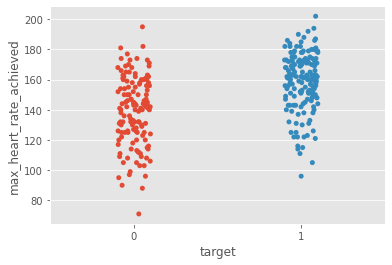

In [0]:
sns.stripplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

Interpretation

We can see that those people suffering from heart disease (**target** = 1) have relatively higher heart rate (**max_heart_rate_achieved**) as compared to people who are not suffering from heart disease (**target** = 0).

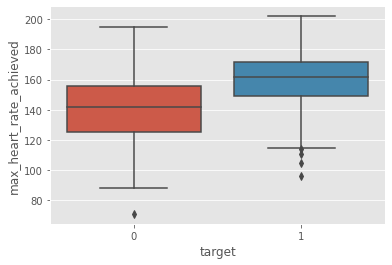

In [0]:
sns.boxplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

## Preprocessing

### Duplication Check

In [0]:
df[df.duplicated(keep=False)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
162,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [0]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Missing Values Check

In [0]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Outlier Detection

In [0]:
box = [go.Box(y=df[col], name=col) for col in df]
layout = go.Layout(title='Outlier Detection')
fig = go.Figure(data=box, layout=layout)
fig.show()

In [0]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# lowerBound = Q1 - 1.5*IQR
# upperBound = Q3 + 1.5*IQR

# original = df.copy()
# df = df[~((df.iloc[:, :-1] < lowerBound) | (df.iloc[:, :-1] > upperBound)).any(axis=1)]
# df.reset_index(drop=True, inplace=True)

# print('Data dengan outlier              : ', original.shape)
# print('Data setelah outlier dihilangkan : ', df.shape)

### Feature Scaling

In [0]:
df = pd.get_dummies(df)
target = df['target'].copy()
df.drop(columns='target', inplace=True)
df['target'] = target
df.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,63,145,233,150,2.3,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
1,37,130,250,187,3.5,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
2,41,130,204,172,1.4,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
3,56,120,236,178,0.8,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1
4,57,120,354,163,0.6,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1


In [0]:
mms = MinMaxScaler()
mms_df = mms.fit_transform(df[feature_continuous])
mms_df = pd.DataFrame(data=mms_df, columns=df[feature_continuous].columns)

In [0]:
mms_df.iplot(kind='hist', subplots=True, title='Min-Max Distribution')

In [0]:
ss = StandardScaler()
ss_df = ss.fit_transform(df[feature_continuous])
ss_df = pd.DataFrame(ss_df, columns=df[feature_continuous].columns)

In [0]:
ss_df.iplot(kind='hist', subplots=True, title='Z-Transform Distribution')

In [0]:
# df[feature_continuous] = mms_df.copy()
df[feature_continuous] = ss_df.copy()

## Split the data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, stratify=df.iloc[:, -1])

## Build Models

### Support Vector Machine

In [0]:
svc = SVC()
svc.fit(x_train, y_train)
print('Train Score : ', svc.score(x_train, y_train))
print('Test Score : ', svc.score(x_test, y_test))

Train Score :  0.9285714285714286
Test Score :  0.8333333333333334


In [0]:
cvSVC = pd.DataFrame(cross_validate(svc, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvSVC

,fit_time,score_time,test_score,train_score
0,0.007922,0.001550,0.900000,0.922222
1,0.005561,0.001401,0.833333,0.918519
2,0.005784,0.001361,0.866667,0.925926
3,0.006058,0.001458,0.966667,0.929630
4,0.005799,0.001370,0.833333,0.925926
5,0.005497,0.001435,0.800000,0.933333
6,0.005603,0.001400,0.866667,0.929630
7,0.005811,0.001390,0.833333,0.929630
8,0.005536,0.001340,0.766667,0.944444
9,0.005942,0.001461,0.766667,0.937037


In [0]:
cvSVC.mean()

fit_time       0.005951
score_time     0.001417
test_score     0.843333
train_score    0.929630
dtype: float64

### Random Forest

In [0]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Train Score : ', rf.score(x_train, y_train))
print('Test Score : ', rf.score(x_test, y_test))

Train Score :  1.0
Test Score :  0.8333333333333334


In [0]:
cvRF = pd.DataFrame(cross_validate(rf, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvRF

,fit_time,score_time,test_score,train_score
0,0.161184,0.008857,0.900000,1.0
1,0.141257,0.009035,0.766667,1.0
2,0.151597,0.008824,0.833333,1.0
3,0.140066,0.008748,0.933333,1.0
4,0.137843,0.008710,0.833333,1.0
5,0.157818,0.008737,0.833333,1.0
6,0.138910,0.008698,0.733333,1.0
7,0.143162,0.008719,0.866667,1.0
8,0.136247,0.008825,0.766667,1.0
9,0.137822,0.009058,0.866667,1.0


In [0]:
cvRF.mean()

fit_time       0.144591
score_time     0.008821
test_score     0.833333
train_score    1.000000
dtype: float64

### Multi Layer Perceptron

In [0]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
print('Train Score : ', mlp.score(x_train, y_train))
print('Test Score : ', mlp.score(x_test, y_test))

Train Score :  0.9380952380952381
Test Score :  0.8444444444444444


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [0]:
cvMLP = pd.DataFrame(cross_validate(mlp, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvMLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

,fit_time,score_time,test_score,train_score
0,0.472494,0.002346,0.900000,0.962963
1,0.477129,0.002133,0.833333,0.962963
2,0.467196,0.002121,0.833333,0.955556
3,0.478959,0.002206,0.866667,0.955556
4,0.508672,0.002100,0.800000,0.959259
5,0.487840,0.002161,0.866667,0.959259
6,0.479444,0.002207,0.800000,0.959259
7,0.490132,0.002069,0.833333,0.951852
8,0.472108,0.002194,0.766667,0.966667
9,0.475669,0.002130,0.766667,0.962963


In [0]:
cvMLP.mean()

fit_time       0.480964
score_time     0.002167
test_score     0.826667
train_score    0.959630
dtype: float64

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(x_train, y_train)
print('Train Score : ', KNN.score(x_train, y_train))
print('Test Score : ', KNN.score(x_test, y_test))

Train Score :  0.861904761904762
Test Score :  0.8444444444444444


In [0]:
cvKNN = pd.DataFrame(cross_validate(KNN, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvKNN

,fit_time,score_time,test_score,train_score
0,0.003346,0.003712,0.900000,0.855556
1,0.002726,0.003103,0.800000,0.862963
2,0.002674,0.002968,0.833333,0.851852
3,0.002750,0.002988,0.966667,0.844444
4,0.002717,0.002994,0.900000,0.848148
5,0.002583,0.002970,0.733333,0.866667
6,0.002871,0.003192,0.866667,0.855556
7,0.002800,0.003180,0.866667,0.851852
8,0.003163,0.003165,0.766667,0.862963
9,0.002694,0.003096,0.800000,0.855556


In [0]:
cvKNN.mean()

fit_time       0.002832
score_time     0.003137
test_score     0.843333
train_score    0.855556
dtype: float64

### Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train, y_train)
print('Train Score : ', nb.score(x_train, y_train))
print('Test Score : ', nb.score(x_test, y_test))

Train Score :  0.7952380952380952
Test Score :  0.7333333333333333


In [0]:
cvnb = pd.DataFrame(cross_validate(nb, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvnb

,fit_time,score_time,test_score,train_score
0,0.004759,0.002382,0.833333,0.844444
1,0.004338,0.001931,0.800000,0.833333
2,0.004163,0.002189,0.833333,0.851852
3,0.002624,0.001147,0.900000,0.829630
4,0.002430,0.001199,0.833333,0.859259
5,0.002344,0.001099,0.833333,0.848148
6,0.002226,0.001084,0.633333,0.755556
7,0.002183,0.001090,0.900000,0.844444
8,0.002172,0.001081,0.733333,0.814815
9,0.002173,0.001111,0.800000,0.851852


In [0]:
cvnb.mean()

fit_time       0.002941
score_time     0.001431
test_score     0.810000
train_score    0.833333
dtype: float64

### Keras Neural Network

In [0]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.constraints import MaxNorm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#### Hyperparameter Tuning

In [0]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [0]:
# split into input (X) and output (Y) variables
X = x_train
Y = y_train

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

##### Batch Size and Number of Epoch

The **batch size** in iterative gradient descent is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory.

The number of **epochs** is the number of times that the entire training dataset is shown to the network during training.

In [0]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", 
                    input_dim = X.shape[1], 
                    units = 12))
    model.add(Dense(activation = "sigmoid", units = 1))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = 'adam', 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn = create_model, verbose = 0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

be = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Best: 0.857143 using {'batch_size': 20, 'epochs': 100}
0.795238 (0.044160) with: {'batch_size': 10, 'epochs': 10}
0.842857 (0.023328) with: {'batch_size': 10, 'epochs': 50}
0.842857 (0.011664) with: {'batch_size': 10, 'epochs': 100}
0.666667 (0.035635) with: {'batch_size': 20, 'epochs': 10}
0.819048 (0.006734) with: {'batch_size': 20, 'epochs': 50}
0.857143 (0.023328) with: {'batch_size': 20, 'epochs': 100}
0.633333 (0.108379) with: {'batch_size': 40, 'epochs': 10}
0.828571 (0.046657) with: {'batch_size': 40, 'epochs': 50}
0.838095 (0.013469) with: {'batch_size': 40, 'epochs': 100}
0.590476 (0.047140) with: {'batch_size': 60, 'epochs': 10}
0.823810 (0.024281) with: {'batch_size': 60, 'epochs': 50}
0.823810 (0.055123) with: {'batch_size': 60, 'epochs': 100}
0.604762 (0.079397) with: {'batch_size': 80, 'epochs': 10}

##### Training Optimization Algorithm

We will tune the **optimization algorithm** used to **train the network**, each with default parameters.

In [0]:
# Function to create model, required for KerasClassifier
def create_model(optimizer = 'adam'):
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", 
                    input_dim = X.shape[1], 
                    units = 12))
    model.add(Dense(activation = "sigmoid", units = 1))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = optimizer, 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn = create_model, epochs=be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

op = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.842857 using {'optimizer': 'Nadam'}
0.800000 (0.020203) with: {'optimizer': 'SGD'}
0.838095 (0.013469) with: {'optimizer': 'RMSprop'}
0.642857 (0.101686) with: {'optimizer': 'Adagrad'}
0.509524 (0.029354) with: {'optimizer': 'Adadelta'}
0.819048 (0.017817) with: {'optimizer': 'Adam'}
0.785714 (0.034993) with: {'optimizer': 'Adamax'}
0.842857 (0.020203) with: {'optimizer': 'Nadam'}


##### Network Weight Initialization

We will look at tuning the selection of **network weight initialization** by evaluating all of the available techniques.

In [0]:
# Function to create model, required for KerasClassifier
def create_model(init_mode = 'uniform'):
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", 
                    input_dim = X.shape[1], 
                    units = 12, 
                    kernel_initializer = init_mode))
    model.add(Dense(activation = "sigmoid", units = 1))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode = init_mode)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ki = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Best: 0.861905 using {'init_mode': 'normal'}
0.847619 (0.013469) with: {'init_mode': 'uniform'}
0.833333 (0.006734) with: {'init_mode': 'lecun_uniform'}
0.861905 (0.017817) with: {'init_mode': 'normal'}
0.542857 (0.040406) with: {'init_mode': 'zero'}
0.819048 (0.017817) with: {'init_mode': 'glorot_normal'}
0.804762 (0.026937) with: {'init_mode': 'glorot_uniform'}
0.823810 (0.006734) with: {'init_mode': 'he_normal'}
0.833333 (0.017817) with: {'init_mode': 'he_uniform'}


##### Neuron Activation Function

The **activation function** controls the non-linearity of individual neurons and when to fire.

Generally, the rectifier **activation function** is the most popular, but it used to be the sigmoid and the tanh functions and these functions may still be more suitable for different problems.

We will evaluate the suite of different **activation functions** available in Keras. We will only use these functions in the hidden layer, as we require a sigmoid **activation function** in the output for the binary classification problem.

In [0]:
# Function to create model, required for KerasClassifier
def create_model(activation = 'relu'):
    # create model
    model = Sequential()
    model.add(Dense(activation = activation, 
                    input_dim = X.shape[1], 
                    units = 12, 
                    kernel_initializer = ki.get('init_mode')))
    model.add(Dense(activation = "sigmoid", 
                    units = 1, 
                    kernel_initializer = 'uniform'))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs = be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation = activation)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ac = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Best: 0.842857 using {'activation': 'linear'}
0.838095 (0.017817) with: {'activation': 'softmax'}
0.838095 (0.017817) with: {'activation': 'softplus'}
0.828571 (0.011664) with: {'activation': 'softsign'}
0.823810 (0.013469) with: {'activation': 'relu'}
0.838095 (0.024281) with: {'activation': 'tanh'}
0.833333 (0.006734) with: {'activation': 'sigmoid'}
0.838095 (0.013469) with: {'activation': 'hard_sigmoid'}
0.842857 (0.020203) with: {'activation': 'linear'}


##### Dropout Regularization

We will look at tuning the **dropout** rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

To get good results, dropout is best combined with a **weight constraint** such as the max norm constraint.

In [0]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate = 0.0, weight_constraint = 0):
    # create model
    model = Sequential()
    model.add(Dense(activation = ac.get('activation'), 
                    input_dim = X.shape[1], 
                    units = 12, 
                    kernel_initializer = ki.get('init_mode'), 
                    kernel_constraint = MaxNorm(weight_constraint)))
    model.add(Dropout(rate = dropout_rate))
    model.add(Dense(activation = "sigmoid", 
                    units = 1, 
                    kernel_initializer='uniform'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn = create_model, epochs = be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate = dropout_rate, weight_constraint = weight_constraint)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

dw = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.852381 using {'dropout_rate': 0.3, 'weight_constraint': 2}
0.842857 (0.020203) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.838095 (0.013469) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.838095 (0.013469) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.842857 (0.020203) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.842857 (0.020203) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.833333 (0.006734) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.838095 (0.013469) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.847619 (0.026937) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.838095 (0.013469) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.842857 (0.020203) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.842857 (0.020203) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.842857 (0.020203) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.842857 (0.020203) with: {'dropout_rate': 0.2, 'weight_constraint': 

##### Number of Neurons in the Hidden Layer 

The number of **neurons** in a layer is an important parameter to tune. Generally the number of **neurons** in a layer controls the representational capacity of the network, at least at that point in the topology.

Also, generally, a large enough single layer network can approximate any other neural network (in Theory).

In [0]:
# Function to create model, required for KerasClassifier
def create_model(neurons = 1):
    # create model
    model = Sequential()
    model.add(Dense(activation = ac.get('activation'), 
                    input_dim = X.shape[1], 
                    units = neurons, 
                    kernel_initializer = ki.get('init_mode'), 
                    kernel_constraint = MaxNorm(dw.get('weight_constraint'))))
    model.add(Dropout(rate = float(dw.get('dropout_rate'))))
    model.add(Dense(activation = "sigmoid", 
                    units = 1, 
                    kernel_initializer='uniform'))
   
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs = be.get('epochs'), batch_size=be.get('batch_size'), verbose = 0)

# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons = neurons)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ne = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.847619 using {'neurons': 15}
0.823810 (0.033672) with: {'neurons': 1}
0.833333 (0.013469) with: {'neurons': 5}
0.842857 (0.023328) with: {'neurons': 10}
0.847619 (0.026937) with: {'neurons': 15}
0.842857 (0.011664) with: {'neurons': 20}
0.838095 (0.006734) with: {'neurons': 25}
0.838095 (0.006734) with: {'neurons': 30}


#### Build Model

Build a model using the acquired tuned hyperparameters from the above steps

In [0]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = ac.get('activation'), 
                     input_dim = X.shape[1], 
                     units = ne.get('neurons'), 
                     kernel_initializer = ki.get('init_mode'), 
                     kernel_constraint = MaxNorm(dw.get('weight_constraint'))))

# Adding the dropout rate
classifier.add(Dropout(rate = float(dw.get('dropout_rate'))))
                     
# Adding the output layer
classifier.add(Dense(activation = "sigmoid", 
                     units = 1, 
                     kernel_initializer = "uniform"))

# Compiling the ANN
classifier.compile(optimizer = op.get('optimizer'),
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

#### Fit and Validation Split of 33% Training Data

Keras can separate a portion of your training data into a validation dataset and evaluate the performance of the model on that validation dataset each epoch.

We can do this by setting the validation_split argument on the fit() function to a percentage of the size of training dataset.

For example, a reasonable value might be 0.2 or 0.33 for 20% or 33% of training data held back for validation.

In [0]:
classifier.fit(x_train, y_train,
               validation_split = 0.33,
               batch_size = be.get('batch_size'), 
               epochs = be.get('epochs'))

Train on 140 samples, validate on 70 samples
Epoch 1/100
140/140 [==============================] - 0s 2ms/sample - loss: 0.6891 - acc: 0.6143 - val_loss: 0.6832 - val_acc: 0.7714
Epoch 2/100
140/140 [==============================] - 0s 120us/sample - loss: 0.6841 - acc: 0.7071 - val_loss: 0.6774 - val_acc: 0.7714
Epoch 3/100
140/140 [==============================] - 0s 118us/sample - loss: 0.6782 - acc: 0.7429 - val_loss: 0.6694 - val_acc: 0.8000
Epoch 4/100
140/140 [==============================] - 0s 141us/sample - loss: 0.6681 - acc: 0.7571 - val_loss: 0.6585 - val_acc: 0.8000
Epoch 5/100
140/140 [==============================] - 0s 135us/sample - loss: 0.6563 - acc: 0.8071 - val_loss: 0.6445 - val_acc: 0.8000
Epoch 6/100
140/140 [==============================] - 0s 112us/sample - loss: 0.6423 - acc: 0.7929 - val_loss: 0.6277 - val_acc: 0.8000
Epoch 7/100
140/140 [==============================] - 0s 137us/sample - loss: 0.6275 - acc: 0.8357 - val_loss: 0.6090 - val_acc: 0.785

#### Training Summary

In [0]:
scoreTrain = classifier.evaluate(x_train, y_train)
print('Train loss :', scoreTrain[0])
print('Train accuracy :', scoreTrain[1])

210/210 [==============================] - 0s 39us/sample - loss: 0.3302 - acc: 0.8667
Train loss : 0.33020545641581217
Train accuracy : 0.8666667


#### Test Summary

In [0]:
scoreTest = classifier.evaluate(x_test, y_test)
print('Test loss :', scoreTest[0])
print('Test accuracy :', scoreTest[1])

90/90 [==============================] - 0s 47us/sample - loss: 0.3602 - acc: 0.8556
Test loss : 0.36020623246828715
Test accuracy : 0.85555553


## Model Evaluation

### Keras Neural Network

####Confusion Matrix

In [0]:
y_pred = classifier.predict(x_test)

Accuracy of the model :  0.8555555555555555


Text(0.5, 15.0, 'Predicted label')

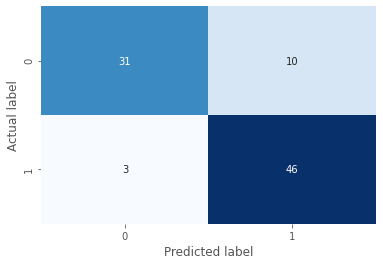

In [0]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d",cbar = False)

#Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy of the model : ', accuracy)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Conclusion